In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import scipy.constants as scipy_const
import sympy as sp
from astropy import constants as const
from astropy import units as u

plt.rcParams.update({'font.size': 30})

In [2]:
h_u=scipy_const.physical_constants["Planck constant in eV s"]; hbar=(h_u[0]/(2*np.pi))*u.eV*u.s
print(h_u)
print(hbar)
c_u = scipy_const.physical_constants["speed of light in vacuum"]; c =(c_u[0])*u.m/u.s #in m/s
print(c_u)
print(c)
k_B_u = scipy_const.physical_constants["Boltzmann constant in eV/K"]; k_B = k_B_u[0]*u.eV/u.K
print(k_B_u)
print(k_B)
r_e = scipy_const.physical_constants["classical electron radius"]; r_e = r_e[0]*u.m #in m
print(r_e)
m_e = scipy_const.m_e; m_e = m_e*u.kg
print(m_e)

(4.135667662e-15, 'eV s', 2.5e-23)
6.582119513926018e-16 eV s
(299792458.0, 'm s^-1', 0.0)
299792458.0 m / s
(8.6173303e-05, 'eV K^-1', 5e-11)
8.6173303e-05 eV / K
2.8179403227e-15 m
9.10938356e-31 kg


## Widmo fotonów rozproszonych w odwrotnym efekcie Comptona:

$$ \frac{dN_{mono}}{dtd \epsilon_{\gamma}} =  \int_{\epsilon_{min}}^{\infty} \frac{2 \pi r_e^2 c}{E_e^2} \cdot 
\frac{n(\epsilon)}{\epsilon} \cdot \left[2q\ln(q)+(1-q) \left(1+2q+\frac{(\Gamma_e q)^2 }{1 + \Gamma_e q} \right) \right] d \epsilon $$
$E_e$ - energia Elektronu, $\epsilon$ - energia fotonów tła, $\epsilon_{\gamma}$ - energia fotonów gamma

$$ \Gamma_e = \frac{4 \epsilon E_e}{m_e^2 c^4}$$

$$ q = \frac{\epsilon_{\gamma}}{\Gamma_e (E_e - \epsilon_{\gamma})} $$

## Gęstość fotonów widma ciała doskonale czarnego o temperaturze $T$ 

$$ n(\epsilon) = \frac{1}{\pi^2 \hbar^3 c^3} \cdot \frac{\epsilon^2}{\exp{ \frac{\epsilon}{k_B T}}-1}$$

In [ ]:
def n(epsilon, T=3*u.K):
    A = 1/((np.pi**2)*(hbar**3)*(c**3))
    return A*((epsilon**2)/(np.exp(epsilon.value/(k_B*T).value) -1))

In [ ]:
%matplotlib inline
energy_range_epsilon = k_B*np.linspace(0.01, 20000, 10000)*u.K
density_of_photon_3K = n(energy_range_epsilon, T = 3*u.K)

fig, ax0 = plt.subplots()
ax0.loglog(energy_range_epsilon, density_of_photon_3K, 'r-', label="T = 3 K")

density_of_photon_300K = n(energy_range_epsilon, T = 300*u.K)
ax0.loglog(energy_range_epsilon, density_of_photon_300K, 'b-', label="T = 300 K")

ax0.set_xlabel('Photon energy background [{0}]'.format(energy_range_epsilon.unit.to_string('latex_inline')))
ax0.set_ylabel('Density of photon [{0}]'.format(density_of_photon_300K.unit.to_string('latex_inline')))
ax0.set_ylim([1e-6, 1e22])
plt.show()

## Znormalizowany rozkład rozporoszonych fotonów dla różnych $\Gamma_e$

$$ 
F(E_e, \Gamma_e, \epsilon_{\gamma}) = 2q\ln(q)+(1-q) \left(1+2q+\frac{(\Gamma_e q)^2 }{1 + \Gamma_e q} \right) 
$$
$E_e$ - energia Elektronu, $\epsilon$ - energia fotonów tła, $\epsilon_{\gamma}$ - energia fotonów gamma

$ \Gamma_e = \frac{4 \epsilon E_e}{m_e^2 c^4}$; $ q = \frac{\epsilon_{\gamma}}{\Gamma_e (E_e - \epsilon_{\gamma})} $;  $E_e = \gamma m_e c^2$



In [3]:
def n(epsilon, T=2.7*u.K):
    A = 1/((np.pi**2)*(hbar**3)*(c**3))
    return A*((epsilon**2)/(np.exp(epsilon/((k_B*T).to(u.GeV)).value) -1))

def F(q, Gamma_e):
    return 2*q*np.log(q)+(1-q)*(1+2*q + ((Gamma_e*q)**2)/(1+Gamma_e*q))

def dN(epsilon, epsilon_gamma, E_e):
    A = (2*np.pi*r_e*r_e*c)/((E_e.to(u.J))**2)
    B = n(epsilon)/epsilon
    Gamma_e = (4*epsilon*E_e)/(((m_e*c*c).to(u.GeV))**2)
    Gamma_e = Gamma_e.value
    q = epsilon_gamma/(Gamma_e*(E_e-epsilon_gamma))
    f = F(q, Gamma_e)
    return (A*B*f).value

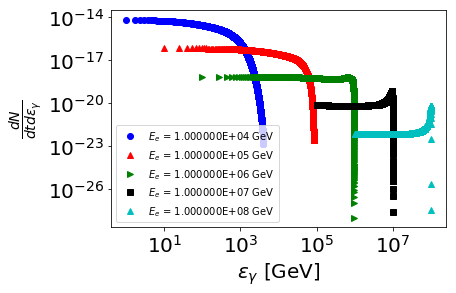

In [5]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})

E_e = 1e4*u.GeV
epsilon_gamma = np.linspace(0.0001, 0.4, 6000)*(E_e)
I = []
b = 20*(k_B*2.7*u.K).to(u.GeV).value
for eps in epsilon_gamma:
    eps_min = ((eps*m_e*m_e*c*c*c*c)/(4*E_e*(E_e-eps))).to(u.GeV)
    a = eps_min.value
    I.append(integrate.fixed_quad(dN, a, b, args=(eps, E_e))[0])
plt.loglog(epsilon_gamma, I, 'bo', label="$E_e$ = {0:2E}".format(E_e))

E_e = 1e5*u.GeV
epsilon_gamma = np.linspace(0.0001, 0.85, 6000)*(E_e)
I = []
b = 20*(k_B*2.7*u.K).to(u.GeV).value
for eps in epsilon_gamma:
    eps_min = ((eps*m_e*m_e*c*c*c*c)/(4*E_e*(E_e-eps))).to(u.GeV)
    a = eps_min.value
    I.append(integrate.fixed_quad(dN, a, b, args=(eps, E_e))[0])
plt.loglog(epsilon_gamma, I, 'r^', label="$E_e$ = {0:2E}".format(E_e))

E_e = 1e6*u.GeV
epsilon_gamma = np.linspace(0.0001, 0.99, 6000)*(E_e)
I = []
b = 20*(k_B*2.7*u.K).to(u.GeV).value
for eps in epsilon_gamma:
    eps_min = ((eps*m_e*m_e*c*c*c*c)/(4*E_e*(E_e-eps))).to(u.GeV)
    a = eps_min.value
    I.append(integrate.fixed_quad(dN, a, b, args=(eps, E_e))[0])
plt.loglog(epsilon_gamma, I, 'g>', label="$E_e$ = {0:2E}".format(E_e))

E_e = 1e7*u.GeV
epsilon_gamma = np.linspace(0.01, 0.9999, 6000)*(E_e)
I = []
b = 20*(k_B*2.7*u.K).to(u.GeV).value
for eps in epsilon_gamma:
    eps_min = ((eps*m_e*m_e*c*c*c*c)/(4*E_e*(E_e-eps))).to(u.GeV)
    a = eps_min.value
    I.append(integrate.fixed_quad(dN, a, b, args=(eps, E_e))[0])
plt.loglog(epsilon_gamma, I, 'ks', label="$E_e$ = {0:2E}".format(E_e))

E_e = 1e8*u.GeV
epsilon_gamma = np.linspace(0.01, 0.99999, 6000)*(E_e)
I = []
b = 20*(k_B*2.7*u.K).to(u.GeV).value
for eps in epsilon_gamma:
    eps_min = ((eps*m_e*m_e*c*c*c*c)/(4*E_e*(E_e-eps))).to(u.GeV)
    a = eps_min.value
    I.append(integrate.fixed_quad(dN, a, b, args=(eps, E_e))[0])
plt.loglog(epsilon_gamma, I, 'c^', label="$E_e$ = {0:2E}".format(E_e))

plt.xlabel(r"$\epsilon_{\gamma}$ [GeV]")
plt.ylabel(r"$\frac{dN}{dtd \epsilon_{\gamma}}$")
plt.legend(loc=3, prop={'size': 10})
plt.rcParams['figure.figsize'] = [13, 8]
plt.show()

## Blumenthal formula
$$ 
F(E_e, \Gamma_e, \epsilon_{\gamma}) = 2q\ln(q)+(1+2q)(1-q) + \frac{1}{2} \cdot \frac{(\Gamma_e q)^2 }{1 + \Gamma_e q} (1-q) 
$$
$E_e$ - energia Elektronu, $\epsilon$ - energia fotonów tła, $\epsilon_{\gamma}$ - energia fotonów gamma

$ \Gamma_e = \frac{4 \epsilon \gamma}{m_e c^2}$; $ q = \frac{E_1}{\Gamma_e (1-E_1)} $;  $E_e = \gamma m_e c^2$

In [ ]:
%matplotlib qt
plt.rcParams.update({'font.size': 30})

def f(Gamma_e, E_1):
    q = E_1/(Gamma_e*(1-E_1))
    return 2*q*np.log(q)+(1+2*q)*(1-q)+0.5*(((Gamma_e*q)**2)/(1+Gamma_e*q))*(1-q)

Gamma_e = [1, 10]
E_hat = np.linspace(0.0000001, 0.999, 1000000)
for e in Gamma_e:
    E_1 = (e*E_hat)/(1+e)
    F = f(e, E_1)
    plt.plot(E_hat, F, label=r"$\Gamma_e$ = {}".format(e))
plt.ylabel("$F(E_e, \Gamma_e, \epsilon_{\gamma})$")
plt.xlabel("$\hat{E}$")
plt.legend()
plt.show()


$$  \frac{dN_{mono}}{dtd \epsilon_{\gamma}} =  \int_{\epsilon_{min}}^{\infty} \frac{2 \pi r_e^2 m_e c^3}{\gamma} \cdot \frac{n(\epsilon)}{\epsilon} \cdot   d \epsilon \cdot F(E_e, \Gamma_e, \epsilon_{\gamma})$$

$$ 
F(E_e, \Gamma_e, \epsilon_{\gamma}) = 2q\ln(q)+(1+2q)(1-q) + \frac{1}{2} \cdot \frac{(\Gamma_e q)^2 }{1 + \Gamma_e q} (1-q) 
$$

$E_e$ - energia Elektronu, $\epsilon$ - energia fotonów tła, $\epsilon_{\gamma}$ - energia fotonów gamma

$ \Gamma_e = \frac{4 \epsilon \gamma}{m_e c^2}$; $ q = \frac{E_1}{\Gamma_e (1-E_1)} $;  $E_e = \gamma m_e c^2$; $E_1 = \frac{\epsilon_{\gamma}}{E_e}$ 

In [ ]:
def dN(epsilon, gamma, epsilon_gamma):
    Gamma_e = (4*epsilon*gamma)/((m_e*c*c).to(u.eV))
    E_1 = epsilon_gamma/(gamma*(m_e*c*c).to(u.eV))
    F=f(Gamma_e.value, E_1)
    return ((((2*np.pi*r_e*r_e*m_e*c*c*c)/gamma)*(n(epsilon)/epsilon))*F).value

def n(epsilon, T=2.7*u.K):
    A = 1/((np.pi**2)*(hbar**3)*(c**3))
    return A*((epsilon**2)/(np.exp(epsilon/(k_B*T).value) -1))

def f(Gamma_e, E_1):
    q = E_1/(Gamma_e*(1-E_1))
    return 2*q*np.log(q)+(1+2*q)*(1-q)+0.5*(((Gamma_e*q)**2)/(1+Gamma_e*q))*(1-q)

In [ ]:
%matplotlib qt5
gamma = 1e5
epsilon_gamma = np.linspace(0.0001, 0.01, 2000)*((m_e*c*c).to(u.eV))*gamma
I = []
for eps in epsilon_gamma:
    I.append(integrate.fixed_quad(dN, (0.0001*k_B*3).value, (20*k_B*3).value, args=(gamma, eps))[0])
plt.loglog(epsilon_gamma.to(u.GeV), I, 'bo')



In [ ]:
%matplotlib qt5
plt.rcParams.update({'font.size': 30})

T = 3
gamma = 19569519
E_e = gamma*(m_e*c*c).to(u.GeV)
print("E_e [GeV] = ", E_e)

epsilon_gamma = np.linspace(0.01, 0.58, 500)*((m_e*c*c).to(u.eV))*gamma
I = []
for eps in epsilon_gamma:
    I.append(integrate.fixed_quad(dN, (0.0001*k_B*3).value, (30*k_B*3).value, args=(gamma, eps))[0])
plt.loglog(epsilon_gamma.to(u.GeV), I, 'ro', label="$E_e$ = {0:2e}".format(E_e))

energy_cutoff = ((4/3)*2.7*k_B*3*u.K)*gamma**2
print("energy cut-off: ", energy_cutoff.to(u.GeV))

gamma = 195695119
E_e = gamma*(m_e*c*c).to(u.GeV)
print("E_e [GeV] = ", E_e)

epsilon_gamma = np.linspace(0.01, 0.85, 500)*((m_e*c*c).to(u.eV))*gamma
I = []
for eps in epsilon_gamma:
    I.append(integrate.fixed_quad(dN, (0.0001*k_B*3).value, (30*k_B*3).value, args=(gamma, eps))[0])
plt.loglog(epsilon_gamma.to(u.GeV), I, 'ko', label="$E_e$ = {0:2e}".format(E_e))
plt.xlabel(r"$\epsilon_{\gamma}$ [eV]")
plt.ylabel(r"$\frac{dN}{dtd \epsilon_{\gamma}}$")
energy_cutoff = ((4/3)*2.7*k_B*3*u.K)*gamma**2
print("energy cut-off: ", energy_cutoff.to(u.GeV))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
%matplotlib qt5
gamma = 195695119000
epsilon_gamma = np.linspace(0.2, 0.99999999999, 20000)*((m_e*c*c).to(u.eV))*gamma
I = []
for eps in epsilon_gamma:
    I.append(integrate.fixed_quad(dN, (0.001*k_B*9).value, (20*k_B*3).value, args=(gamma, eps))[0])
plt.loglog(epsilon_gamma.to(u.GeV), I, 'ko')
plt.xlabel(r"$E_{\gamma}$ [GeV]")
plt.ylabel(r"$\frac{dN}{dtdE}$")
energy_cutoff = ((4/3)*2.7*k_B*3*u.K)*gamma**2
print("energy cut-off: ", energy_cutoff.to(u.GeV))

gamma = 1956951190000
epsilon_gamma = np.linspace(0.2, 0.99999999999, 20000)*((m_e*c*c).to(u.eV))*gamma
I = []
for eps in epsilon_gamma:
    I.append(integrate.fixed_quad(dN, (0.001*k_B*9).value, (20*k_B*3).value, args=(gamma, eps))[0])
plt.loglog(epsilon_gamma.to(u.GeV), I, 'r^')
plt.xlabel(r"$E_{\gamma}$ [GeV]")
plt.ylabel(r"$\frac{dN}{dtdE}$")
energy_cutoff = ((4/3)*2.7*k_B*3*u.K)*gamma**2
print("energy cut-off: ", energy_cutoff.to(u.GeV))
plt.show()

In [ ]:
energy_cutoff = ((4/3)*2.7*k_B*3*u.K)*gamma**2
print(energy_cutoff.to(u.GeV))
energy = gamma*m_e*c*c
#print(energy.to(u.eV))
gamma = (10**5*u.GeV)/((m_e*c*c).to(u.GeV))
print(gamma)

In [ ]:
# in GeV
def dN(epsilon, gamma, epsilon_gamma):
    Gamma_e = (4*epsilon*gamma)/((m_e*c*c).to(u.GeV))
    E_1 = epsilon_gamma/(gamma*(m_e*c*c).to(u.GeV))
    F=f(Gamma_e.value, E_1)
    return ((((2*np.pi*r_e*r_e*m_e*c*c*c)/gamma)*(n(epsilon)/epsilon))*F).value

def n(epsilon, T=3*u.K):
    A = 1/((np.pi**2)*(hbar**3)*(c**3))
    return A*((epsilon**2)/(np.exp(epsilon/((k_B*T).to(u.GeV)).value) -1))

def f(Gamma_e, E_1):
    q = E_1/(Gamma_e*(1-E_1))
    return 2*q*np.log(q)+(1+2*q)*(1-q)+0.5*(((Gamma_e*q)**2)/(1+Gamma_e*q))*(1-q)

In [ ]:
a = 0.0001*(k_B*3*u.K).to(u.GeV).value
print(a)

In [ ]:
gamma = 1e5
#gamma = 1956951199
E_e = gamma*(m_e*c*c).to(u.GeV)
print("E_e [GeV] = ", E_e)

epsilon_gamma = np.linspace(0.0001, 0.005, 2000)*((m_e*c*c).to(u.GeV))*gamma
I = []
a = 0.001*(k_B*2.7*u.K).to(u.GeV).value
b = 20*(k_B*2.7*u.K).to(u.GeV).value
for eps in epsilon_gamma:
    I.append(integrate.fixed_quad(dN, a, b, args=(gamma, eps))[0])
plt.loglog(epsilon_gamma, I, 'bo')
plt.show()